## Background
LendingClub is an American peer-to-peer lending company. P2P loans are loans made by individuals and investors – as opposed to loans that come from a bank. People with extra funds offer to lend that money to borroweres in need of cash. A P2P service (such as a website) matches lenders and borrowers so that the process is relatively easy for all parties.

## Objective
Loan default prediction is a common problem for lending companies. This analysis focusses on using the Lending Club dataset which is available on Kaggle. The objective is to make predictions about loan default and whether investors should lend to a customer or not based on their risk profile. Data is from 2007-2018 where most of the loans from that period have already been repaid or defaulted on. 

The goal of this analysis is to identify credit-worthy customers that were not recognized by traditional credit scores,and predict the possibility of current loans becoming bad. This will help LendingClub minimize default risk and make higher profits in future.

#### 1. Problem Statement

To develop a basic understanding of risk analytics how data is used to minimise the risk of losing money while lending to customers.

lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Defaulters cause large credit losses to the lenders. The customers labelled as 'charged-off' are the 'defaulters'.

#### 2. Data Dictionary

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>
​
---
----

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [4]:
file_path = r'C:\Users\capri\Workspace\Python cheatsheet\lending_club\accepted_2007_to_2018Q4.csv'

In [5]:
df = pd.read_csv(file_path, low_memory=False)

In [6]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

In [7]:
df.shape

(2260701, 151)

#### 3. Check the data for nulls-

In [8]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

member_id                                     1.000000
orig_projected_additional_accrued_interest    0.996173
hardship_end_date                             0.995171
hardship_start_date                           0.995171
hardship_type                                 0.995171
hardship_reason                               0.995171
hardship_status                               0.995171
deferral_term                                 0.995171
hardship_last_payment_amount                  0.995171
hardship_payoff_balance_amount                0.995171
dtype: float64

The data has 151 columns and there are columns with a chunk of missing values. Out of the columns we will keep the features which have less than 30% of nulls. 

Text(0, 0.5, 'Feature count')

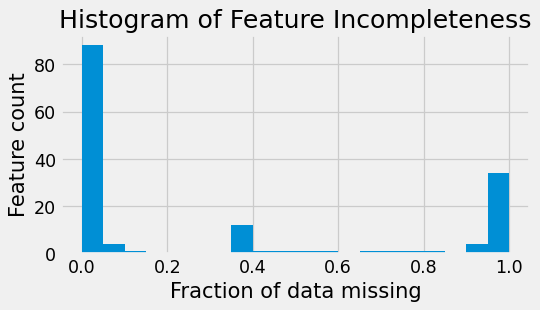

In [9]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

From the above histogram, we see there's a large gap between features missing "some" data (<20%) and those missing "lots" of data (>40%). It is difficult to accurately impute data with more than 30% missing values, so we will drop these columns. First store missing data in an alphabetical list:

In [10]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)
print("\n\n Drop Features: ", len(drop_list))

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [11]:
# Drop these features
df.drop(labels=drop_list, axis=1, inplace=True)

In [12]:
df.shape

(2260701, 93)

In [13]:
print(sorted(df.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

For each of these features, we'll check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.

List the feature columns required for analysis and drop all of the remainder-

In [14]:
keep_list = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
             'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 
             'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 
             'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 
             'mort_acc', 'pub_rec_bankruptcies']

print(f"Keep features: {len(keep_list)}")

Keep features: 33


In [15]:
drop_list = [column for column in df.columns if column not in keep_list]

print(drop_list)

print(f"Drop Columns: {len(drop_list)}")

['pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred

In [16]:
df.drop(labels=drop_list, axis=1, inplace=True)

df.shape

(2260701, 33)

#### 4. Inspecting Datatypes
We will begin by inspecting the data types, and using the describe function to identify target variable

In [17]:
df.dtypes

id                       object
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc

In [18]:
df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  68407277     3600.0       3600.0           3600.0   36 months     13.99   
1  68355089    24700.0      24700.0          24700.0   36 months     11.99   
2  68341763    20000.0      20000.0          20000.0   60 months     10.78   
3  66310712    35000.0      35000.0          35000.0   60 months     14.85   
4  68476807    10400.0      10400.0          10400.0   60 months     22.45   

   installment grade sub_grade                    emp_title  ...  \
0       123.03     C        C4                      leadman  ...   
1       820.28     C        C1                     Engineer  ...   
2       432.66     B        B4                 truck driver  ...   
3       829.90     C        C5  Information Systems Officer  ...   
4       289.91     F        F1          Contract Specialist  ...   

  fico_range_high open_acc  pub_rec revol_bal revol_util total_acc  \
0           679.0      7.0      0.0    2765.0       29.7      13.0   
1           719.0     22.0      0.0   21470.0       19.2      38.0   
2           699.0      6.0      0.0    7869.0       56.2      18.0   
3           789.0     13.0      0.0    7802.0       11.6      17.0   
4           699.0     12.0      0.0   21929.0       64.5      35.0   

  initial_list_status application_type mort_acc pub_rec_bankruptcies  
0                   w       Individual      1.0                  0.0  
1                   w       Individual      4.0                  0.0  
2                   w        Joint App      5.0                  0.0  
3                   w       Individual      1.0                  0.0  
4                   w       Individual      6.0                  0.0  

[5 rows x 33 columns]

In [19]:
df.describe(include=object)

id        term    grade sub_grade emp_title emp_length  \
count    2260701     2260668  2260668   2260668   2093699    2113761   
unique   2260701           2        7        35    512694         11   
top     68407277   36 months        B        C1   Teacher  10+ years   
freq           1     1609754   663557    145903     38824     748005   

       home_ownership verification_status   issue_d loan_status  \
count         2260668             2260668   2260668     2260668   
unique              6                   3       139           9   
top          MORTGAGE     Source Verified  Mar-2016  Fully Paid   
freq          1111450              886231     61992     1076751   

                   purpose               title zip_code addr_state  \
count              2260668             2237343  2260667    2260668   
unique                  14               63155      956         51   
top     debt_consolidation  Debt consolidation    112xx         CA   
freq               1277877             1153293    23908     314533   

       earliest_cr_line initial_list_status application_type  
count           2260639             2260668          2260668  
unique              754                   2                2  
top            Sep-2004                   w       Individual  
freq              15400             1535467          2139958

#### 5. Defining Target Variable
Since the aim is to identify the variables that influence the tendency of default, loan_status is our target variable.

In [20]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

Since 'Current' are the currently active customers we need to ignore these for our analysis. We will focus on 'fully paid' and 'charged off' categories only.

#### 6. EDA

In [21]:
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

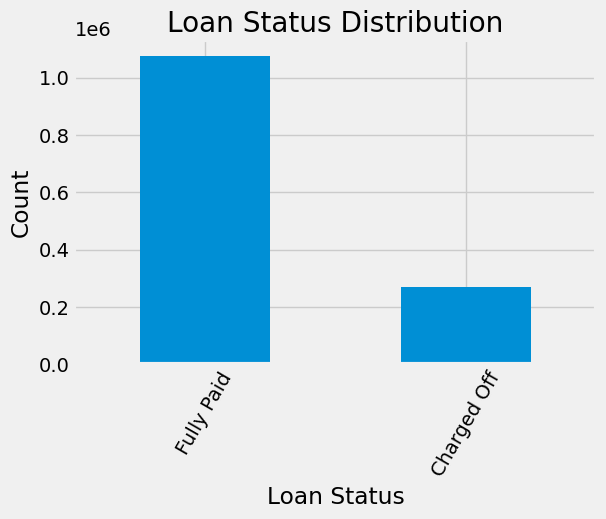

In [22]:
plt.figure(figsize=(6, 4))
df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.xticks(rotation=60)
plt.show()

Around 22% of total loan counts have defaulted.

Next we will plot numerical variables to see their distribution and correlation matrix to identify variables that are highly correlated.

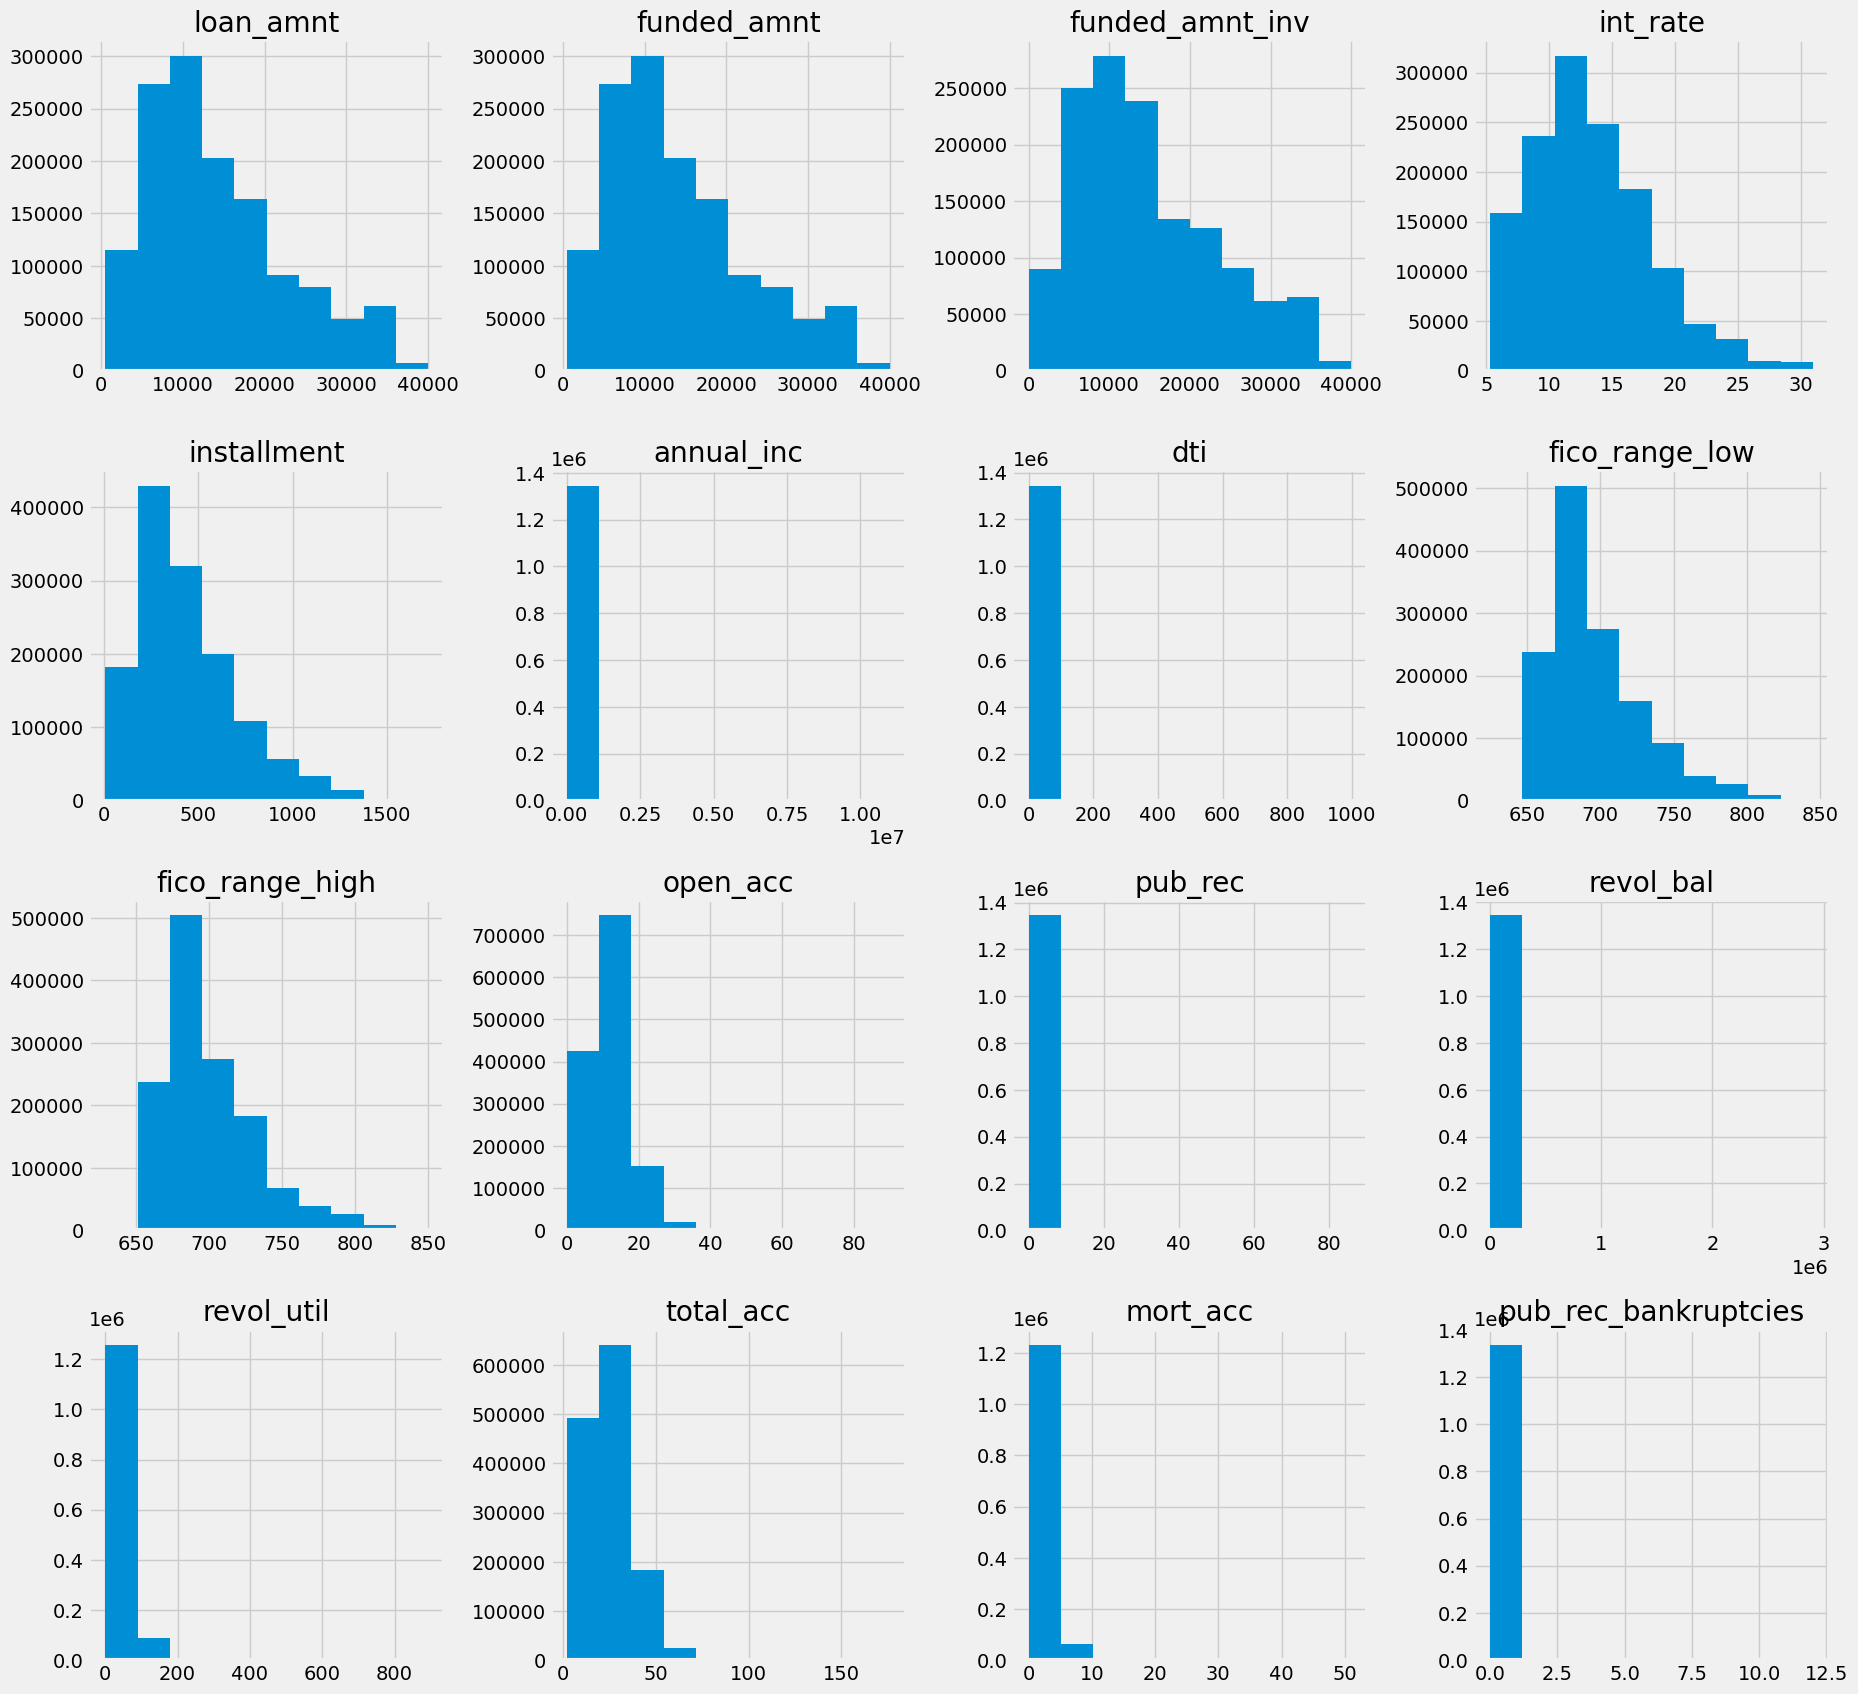

In [23]:
df.hist(figsize=(20,20));

<AxesSubplot:>

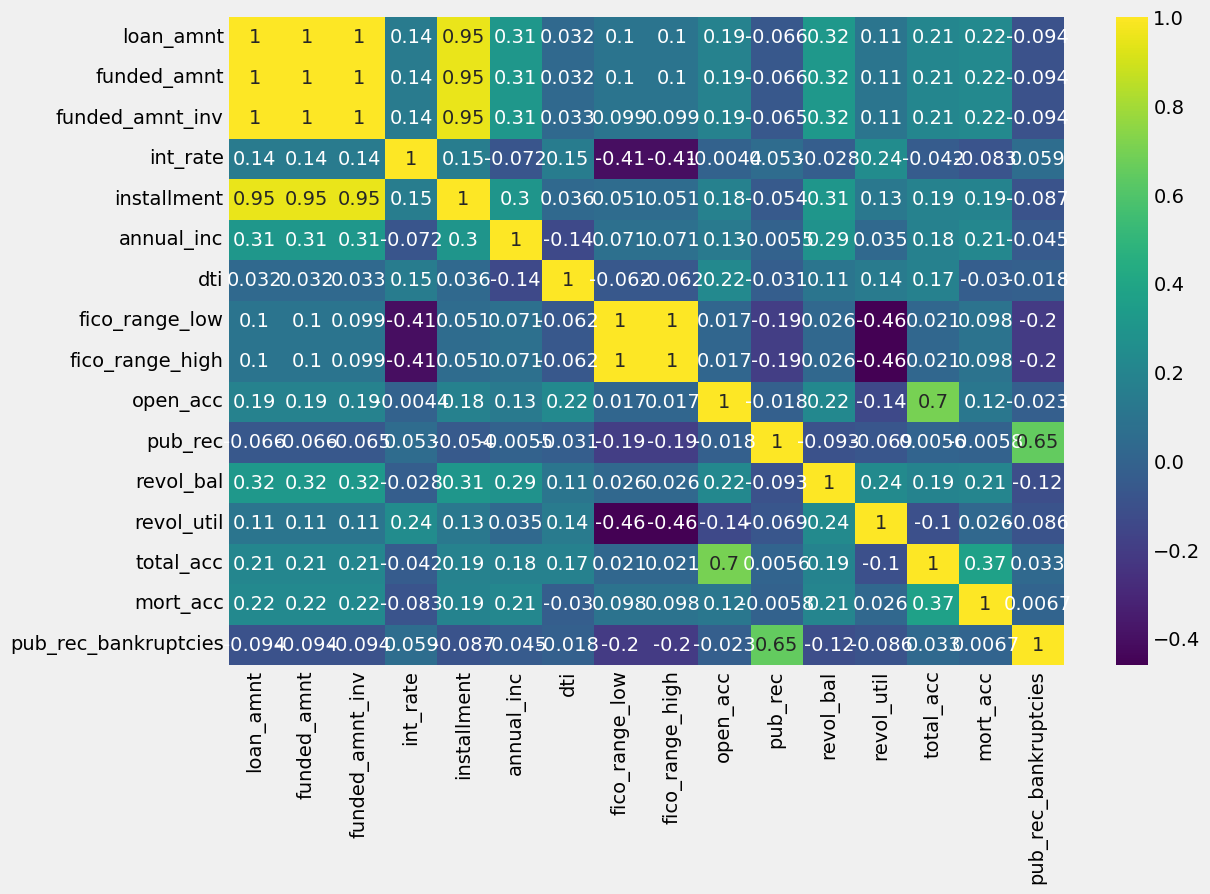

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

There is high correlation between loan amounts and installment. Moderate correlation between loan amounts and annual income.

#### Loan amount and Installment:

In [25]:
df['loan_amnt'].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

Count: 1,345,310, 
Mean: $14,420,  
Minimum Loan Amount: $500,
Median: $12,000,
Maximum Loan Amount: $40,000

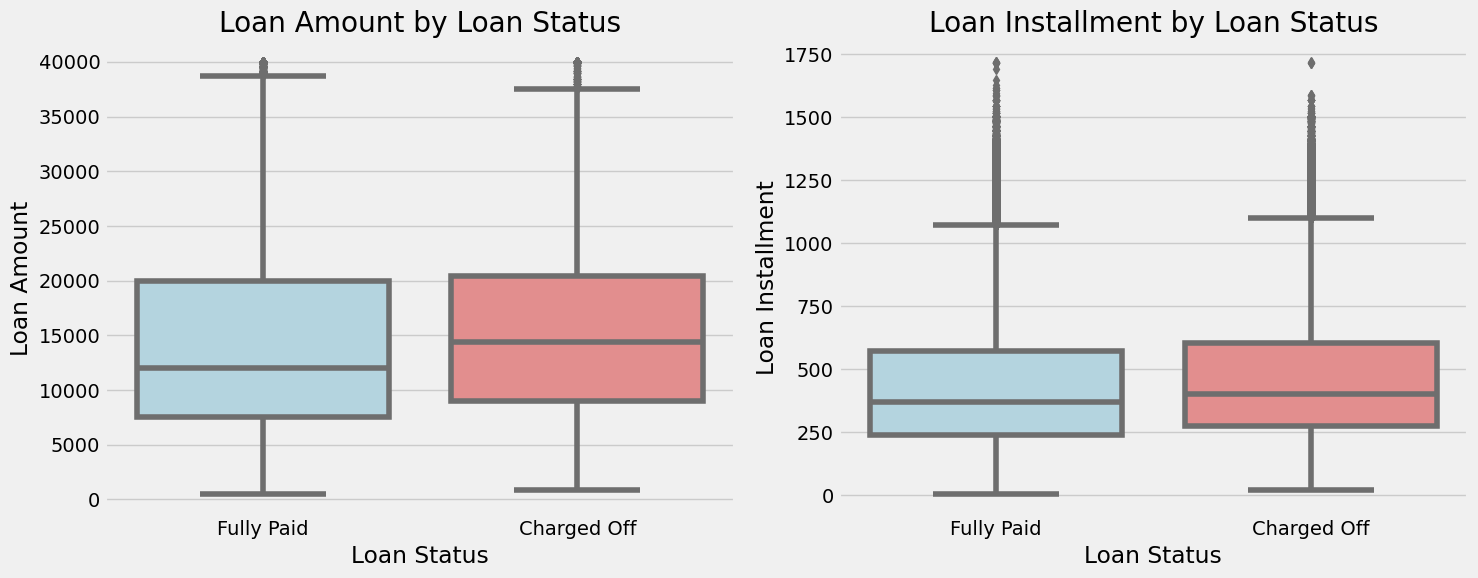

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
custom_palette = {'Fully Paid': 'lightblue', 'Charged Off': 'lightcoral'}

# Plot 1: Loan Status by Loan Amount
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette=custom_palette, ax=axes[0])
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Loan Amount')
axes[0].set_title('Loan Amount by Loan Status')

# Plot 2: Loan Status by Loan Installment
sns.boxplot(x='loan_status', y='installment', data=df, palette=custom_palette, ax=axes[1])
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Loan Installment')
axes[1].set_title('Loan Installment by Loan Status')

plt.tight_layout()

plt.show()

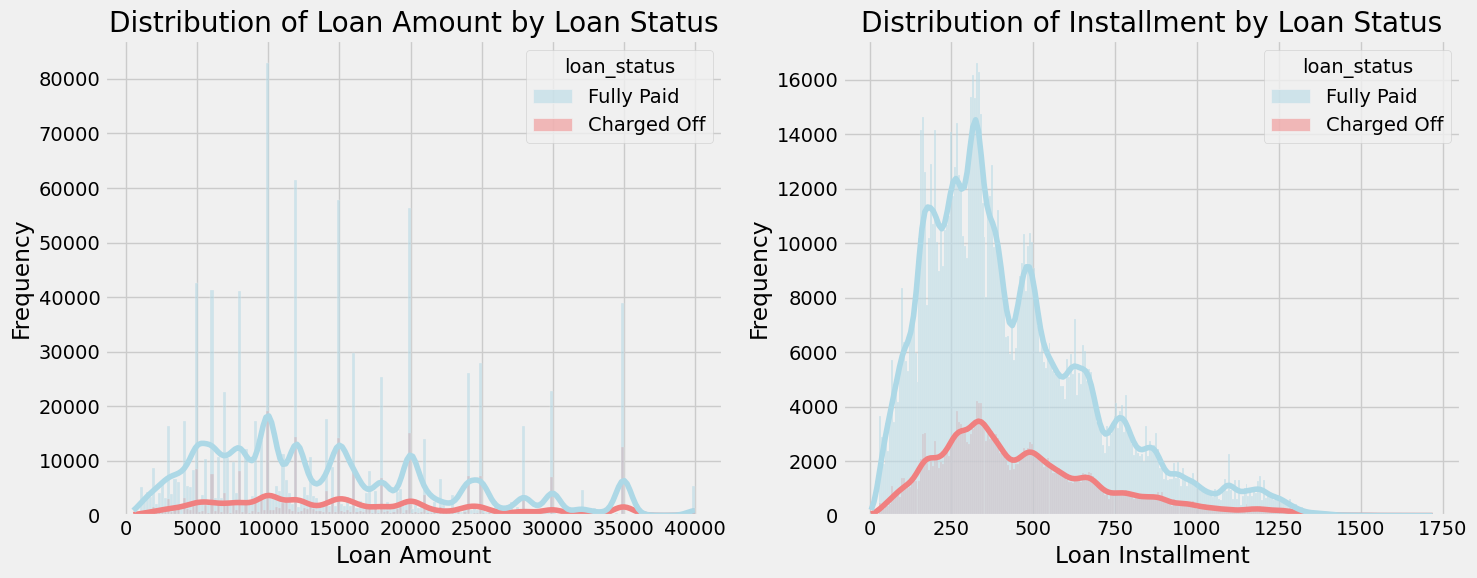

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Distribution of Loan Amount by Loan Status
sns.histplot(data=df, x='loan_amnt', hue='loan_status', ax=axes[0], kde=True, palette=custom_palette)
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Loan Amount by Loan Status')

# Subplot 2: Distribution of Installment by Loan Status
sns.histplot(data=df, x='installment', hue='loan_status', ax=axes[1], kde=True, palette=custom_palette)
axes[1].set_xlabel('Loan Installment')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Installment by Loan Status')

plt.tight_layout()

plt.show()

In [28]:
df.groupby(by='loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                                 
Charged Off   268559.0  15565.055444  8814.560077  900.0  9000.0  14350.0   
Fully Paid   1076751.0  14134.369808  8669.028973  500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20400.0  40000.0  
Fully Paid   20000.0  40000.0

####  Interest Rate, Annual Income

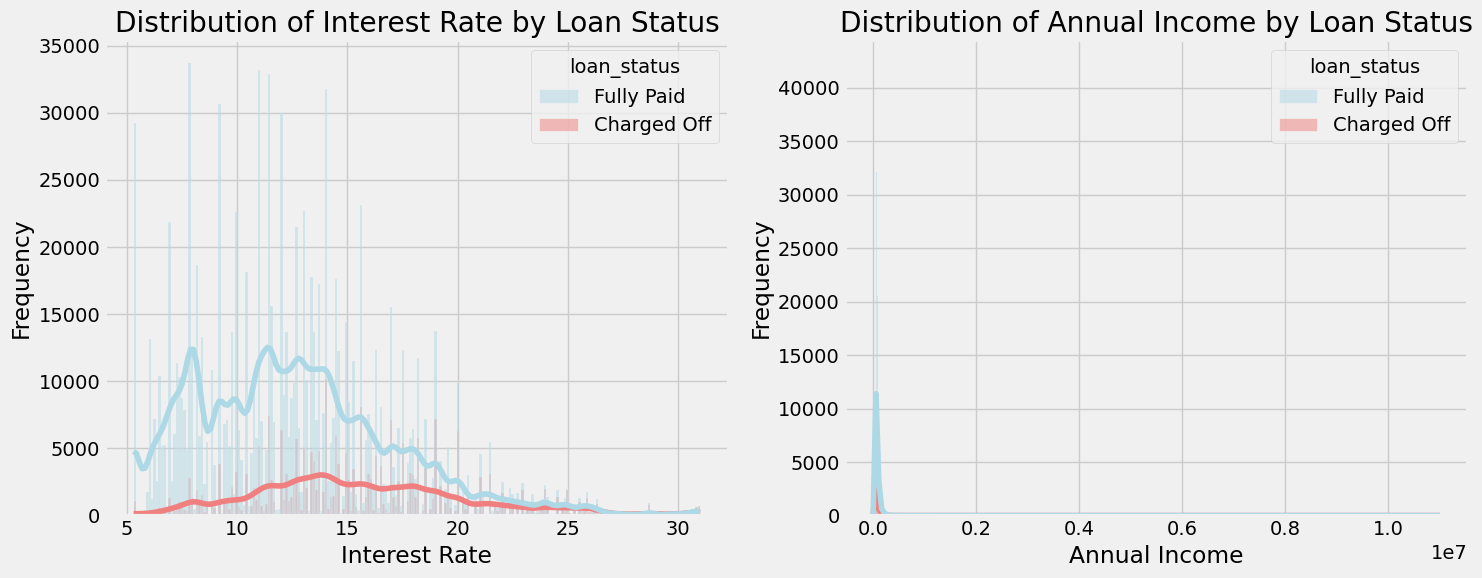

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Distribution of Int rate by Loan Status
sns.histplot(data=df, x='int_rate', hue='loan_status', ax=axes[0], kde=True, palette=custom_palette)
axes[0].set_xlabel('Interest Rate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Interest Rate by Loan Status')

# Subplot 2: Distribution of Annual income by Loan Status
sns.histplot(data=df, x='annual_inc', hue='loan_status', ax=axes[1], kde=True, palette=custom_palette)
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Annual Income by Loan Status')

plt.tight_layout()

plt.show()

In [30]:
# annual_income has outliers. Median income is $65,000
df['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

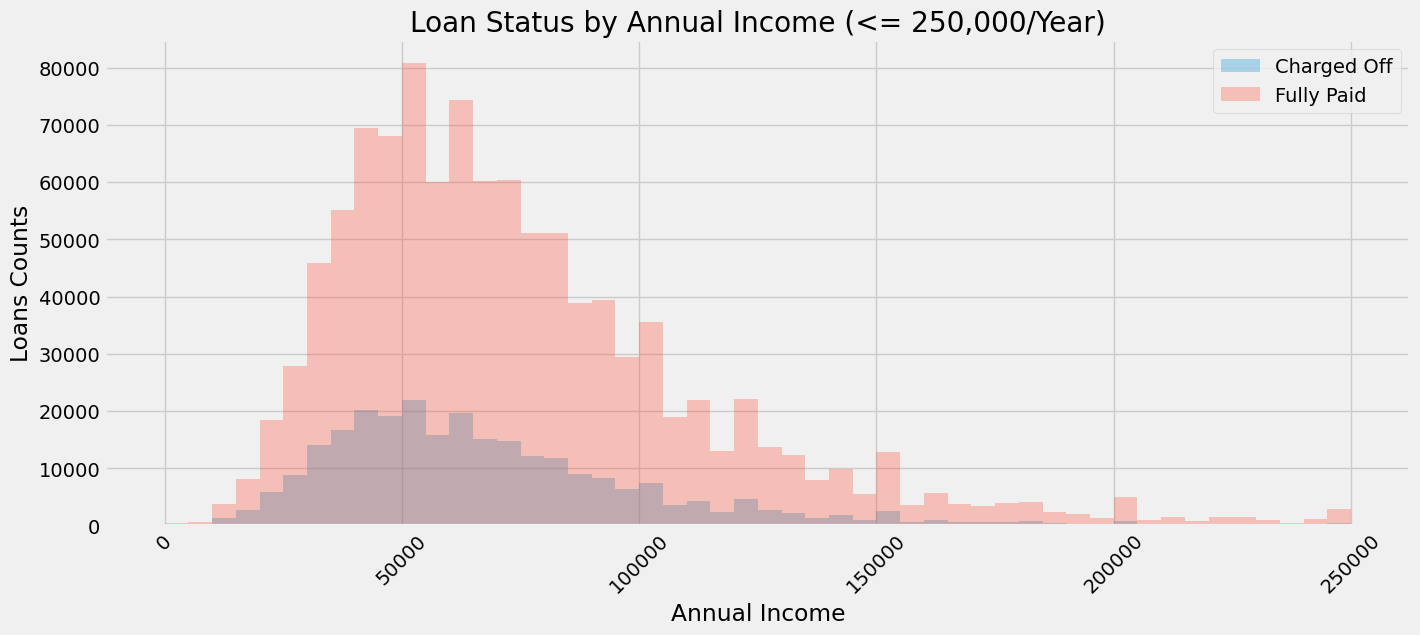

In [31]:
df_filtered = df[df['annual_inc'] <= 250000]

plt.figure(figsize=(15, 6))
ax = plt.gca()

# Create histograms for each loan status
for loan_status, group in df_filtered.groupby('loan_status'):
    group['annual_inc'].plot(kind='hist', bins=50, alpha=0.3, ax=ax, label=loan_status)

plt.title("Loan Status by Annual Income (<= 250,000/Year)")
plt.xlabel('Annual Income')
plt.ylabel('Loans Counts')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

plt.show()

####  High interest rate loans are more likely to default, specially when the avg annual income is <70k

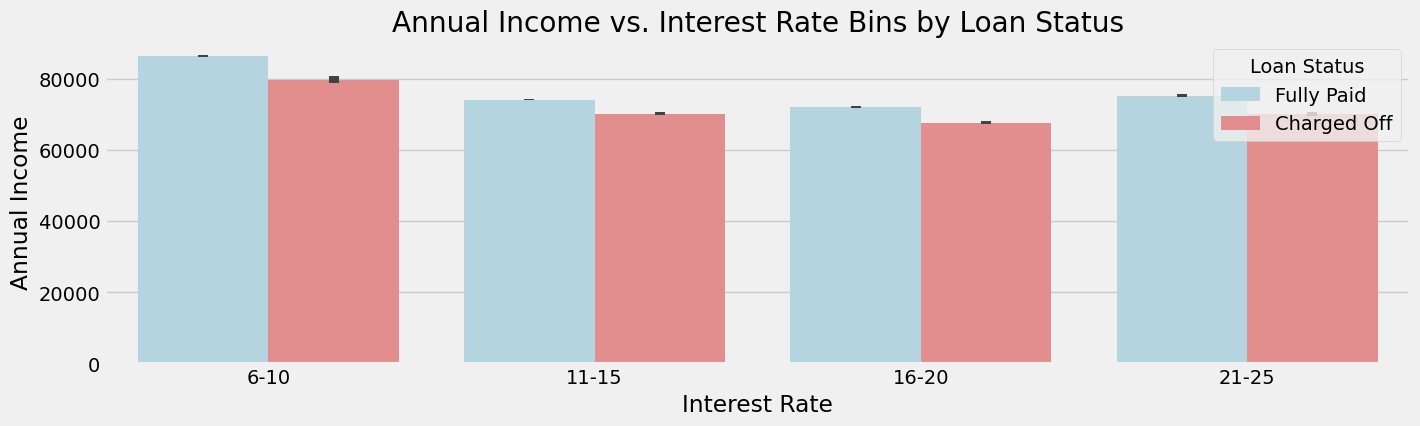

In [32]:
bins = [5, 10, 15, 20, 25]

df['int_rate_bin'] = pd.cut(df['int_rate'], bins=bins, labels=['6-10', '11-15', '16-20', '21-25'])

plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='int_rate_bin', y='annual_inc', hue='loan_status', palette=custom_palette)
plt.title("Annual Income vs. Interest Rate Bins by Loan Status")
plt.xlabel("Interest Rate")
plt.ylabel("Annual Income")
plt.legend(title="Loan Status", loc="upper right")

plt.show()

####  Debt to Income Ratio analysis. Charged off tend to have higher debt-to-income ratios.

In [33]:
df.groupby('loan_status')['dti'].describe()

count       mean        std  min    25%    50%    75%    max
loan_status                                                                  
Charged Off   268488.0  20.171196  11.831747  0.0  13.55  19.76  26.31  999.0
Fully Paid   1076448.0  17.811629  10.935927 -1.0  11.43  17.11  23.44  999.0

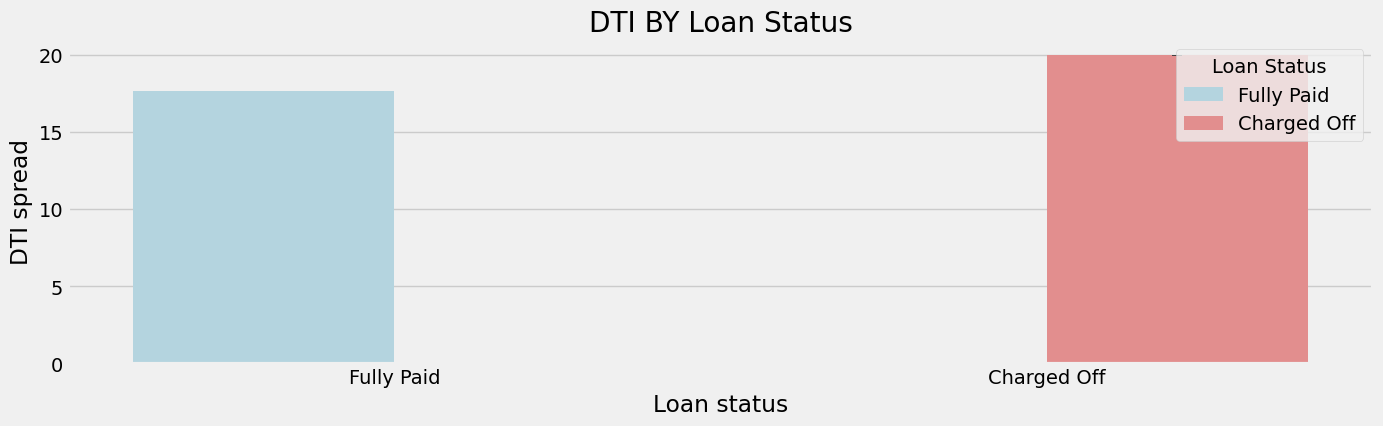

In [34]:
dti_df = df[df['dti']<=50]

plt.figure(figsize=(15, 4))
sns.barplot(y='dti', x='loan_status', data =dti_df, hue='loan_status', palette=custom_palette)
plt.title('DTI BY Loan Status')
plt.ylabel('DTI spread')
plt.xlabel('Loan status')
plt.legend(title="Loan Status", loc="upper right")
plt.show()

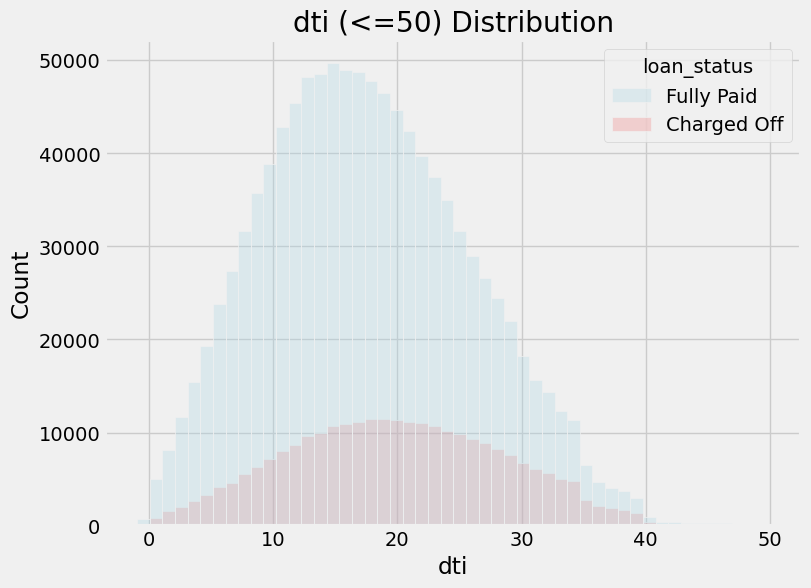

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dti_df, x='dti', hue='loan_status', bins=50, palette=custom_palette,
             alpha=0.3, label=loan_status)
plt.title("dti (<=50) Distribution")
plt.xlabel('dti')
plt.ylabel('Count')

plt.show()

####  Categorical variables for default prediction


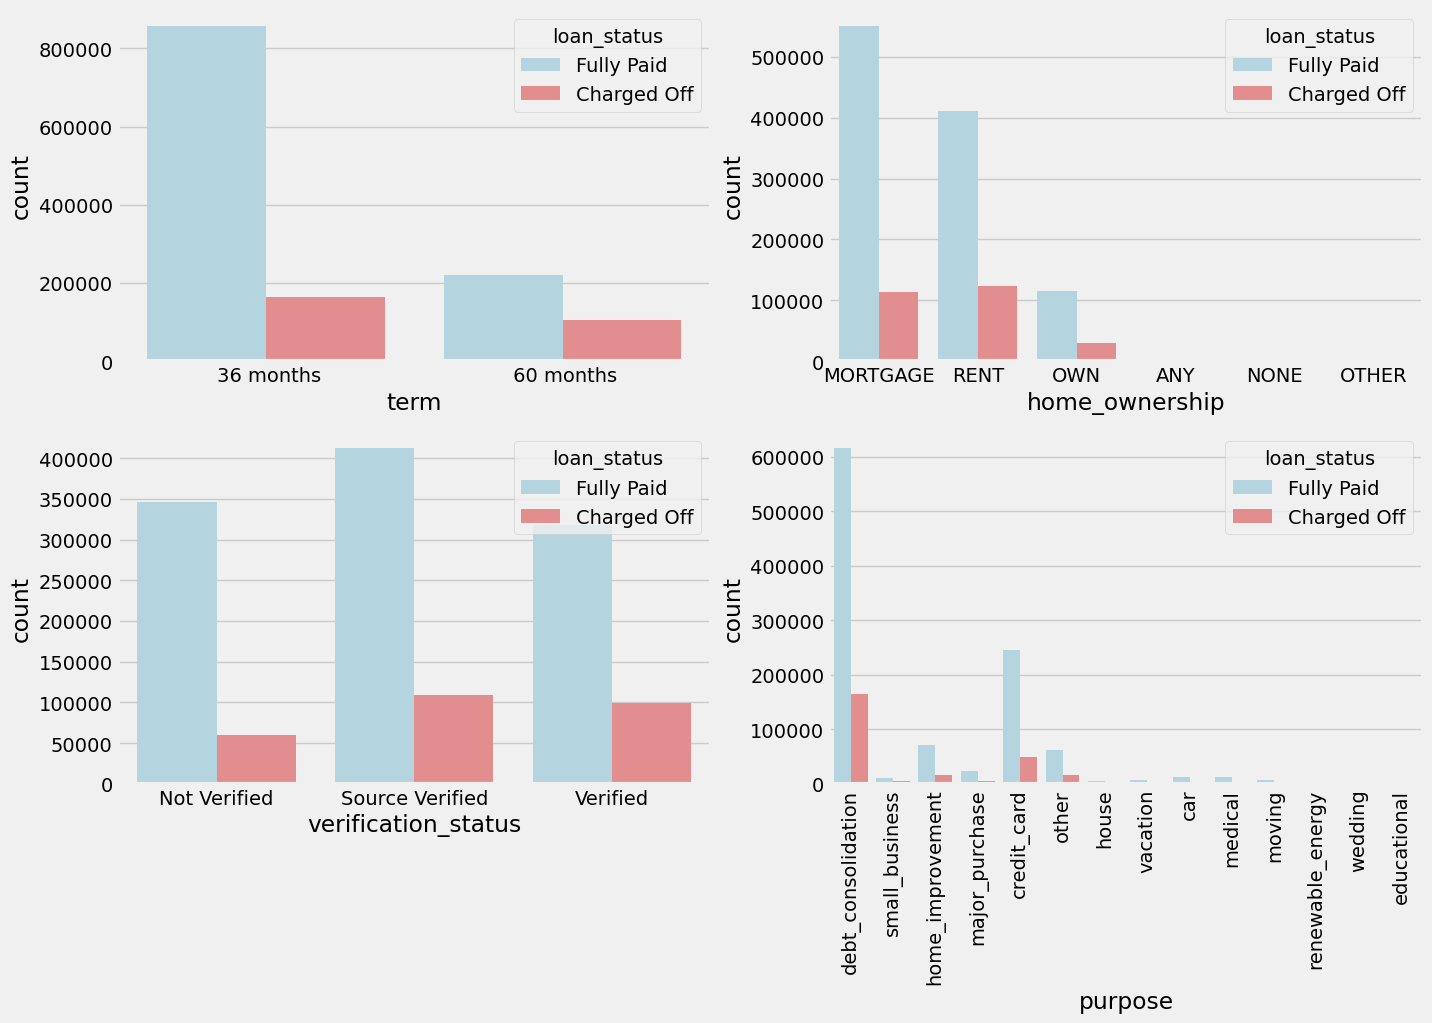

In [36]:
# countplots - term, home_ownership, verification_status, purpose, emp_length
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status', palette=custom_palette)

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status', palette=custom_palette)

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status', palette=custom_palette)

plt.subplot(4, 2, 4)
fig = sns.countplot(x='purpose', data=df, hue='loan_status', palette=custom_palette)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

1. 36 month term loans have a higher default rate
2. Rent and Mortgage holders are more likely to default
3. Verification status doesnt seem to impact default liklihood
4. Credit card and debt_consol are more likely to default

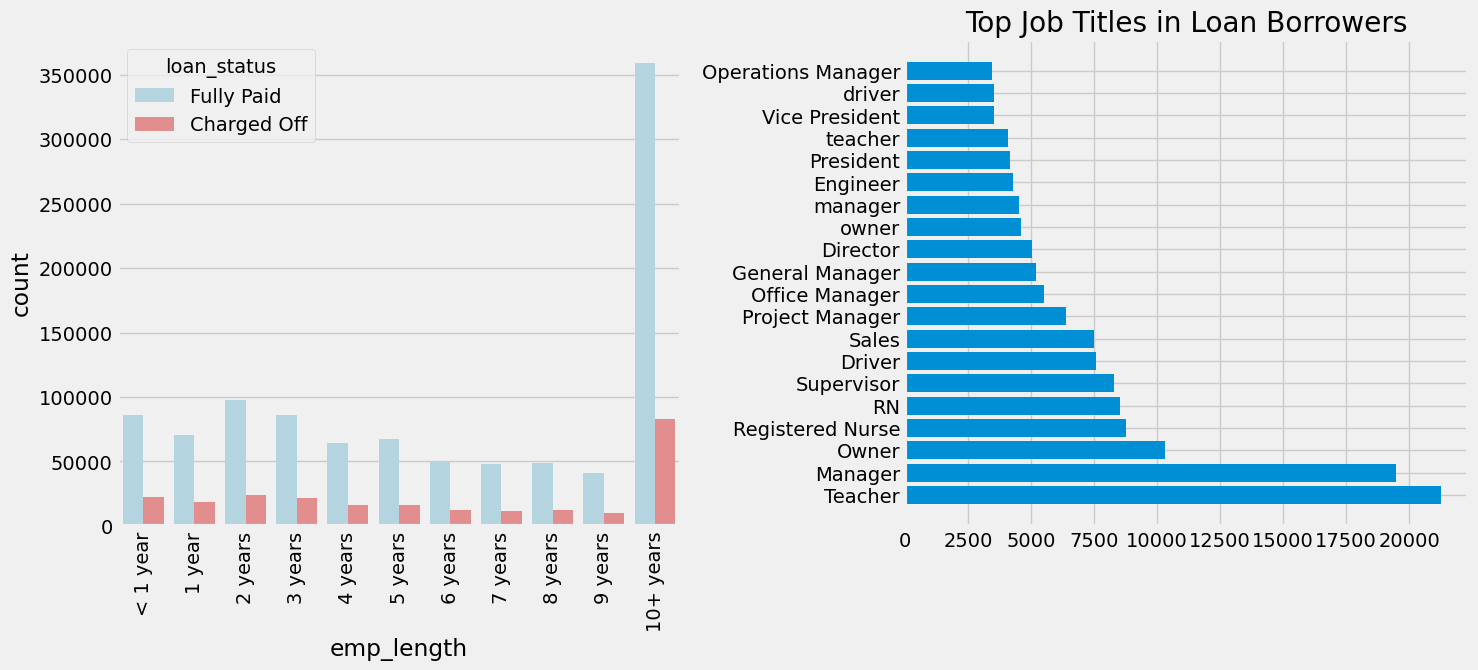

In [37]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years']
fig = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order, palette=custom_palette)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:20].index, df.emp_title.value_counts()[:20])
plt.title("Top Job Titles in Loan Borrowers")
plt.tight_layout()

####  Analysing Loan grade - 'C' grade loans are most likely to default

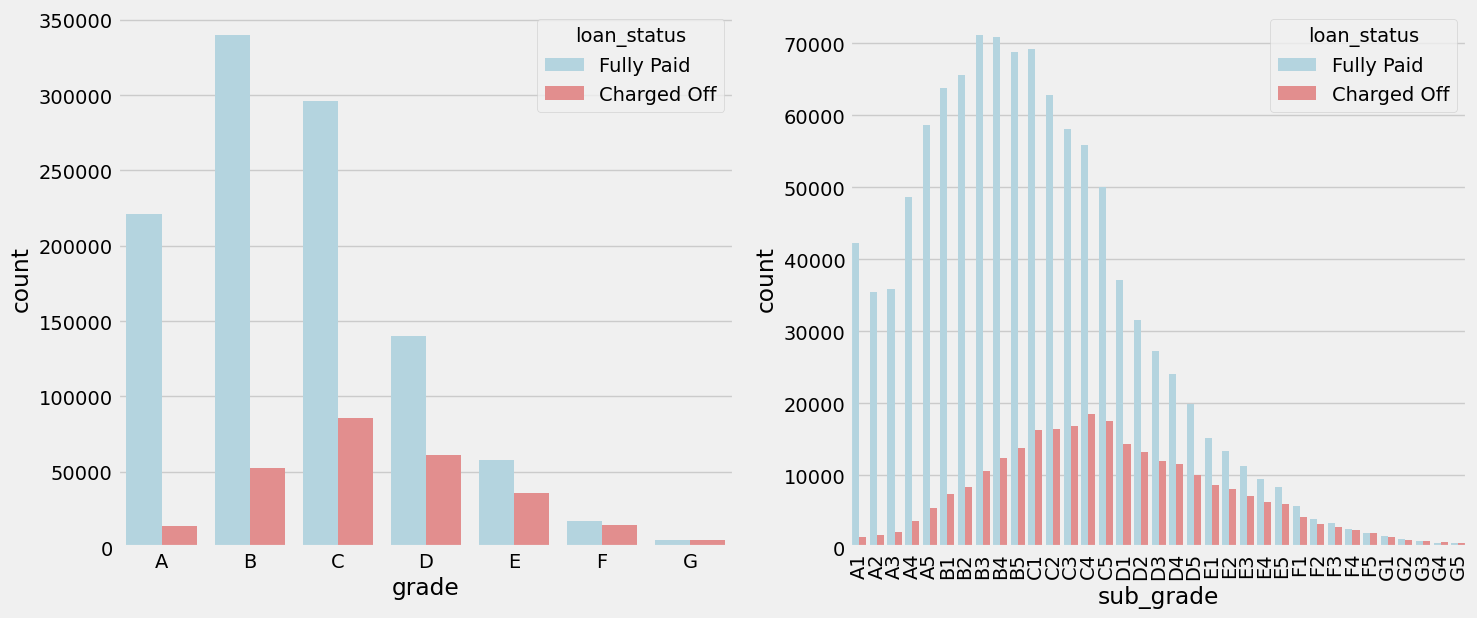

In [38]:
sorted_grades = sorted(df['grade'].unique())
sorted_sub_grades = sorted(df['sub_grade'].unique())

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=df, hue='loan_status', palette=custom_palette, order=sorted_grades)

plt.subplot(2, 2, 2)
fig = sns.countplot(x='sub_grade', data=df, hue='loan_status', palette=custom_palette, order=sorted_sub_grades)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

plt.tight_layout()

In [39]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

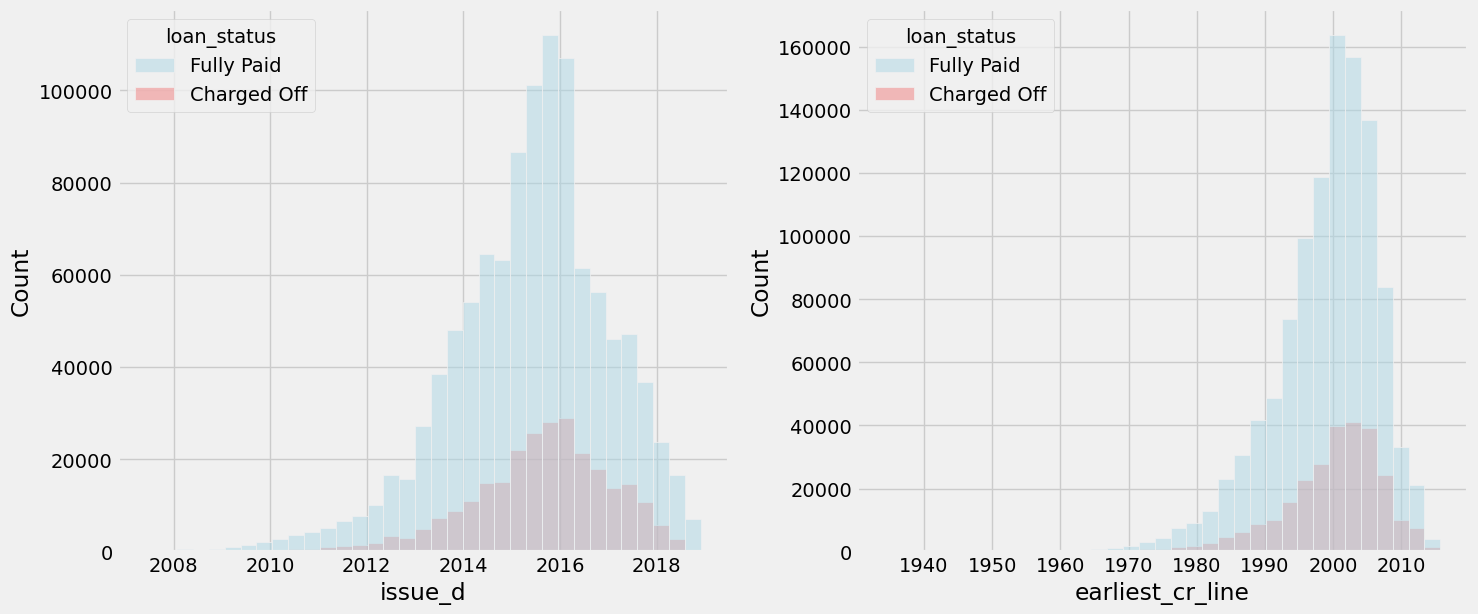

In [40]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='issue_d', hue='loan_status', bins=35, palette=custom_palette)

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='earliest_cr_line', hue='loan_status', bins=35, palette=custom_palette)


plt.tight_layout()
plt.show()

Text(0, 0.5, 'Loan %')

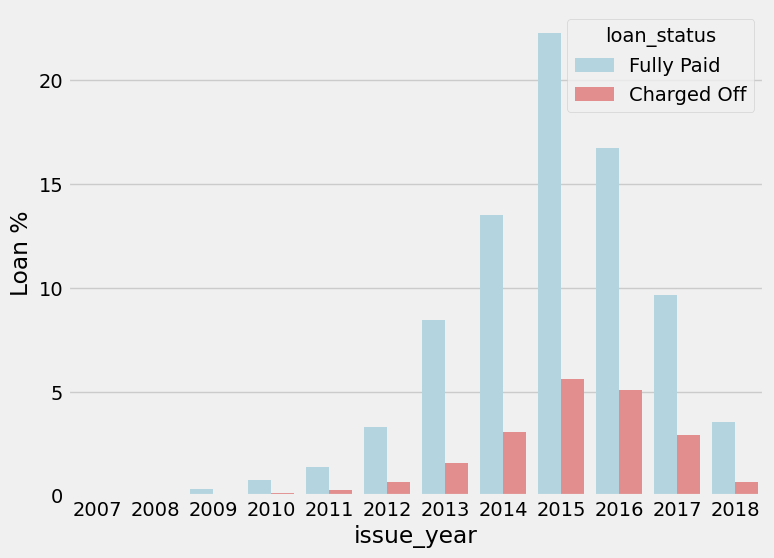

In [41]:
df['issue_year'] = df['issue_d'].dt.year

sns.barplot(x='issue_year', y='loan_amnt', hue='loan_status', data=df, palette=custom_palette, 
            estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Loan %')


2015 & 2016 had the highest default rates. Drill down into months can be done in Tableau

#### Analysis of State and Regions by Loan Status- plot in map in Tableau

In [42]:
df['addr_state'].nunique()

51

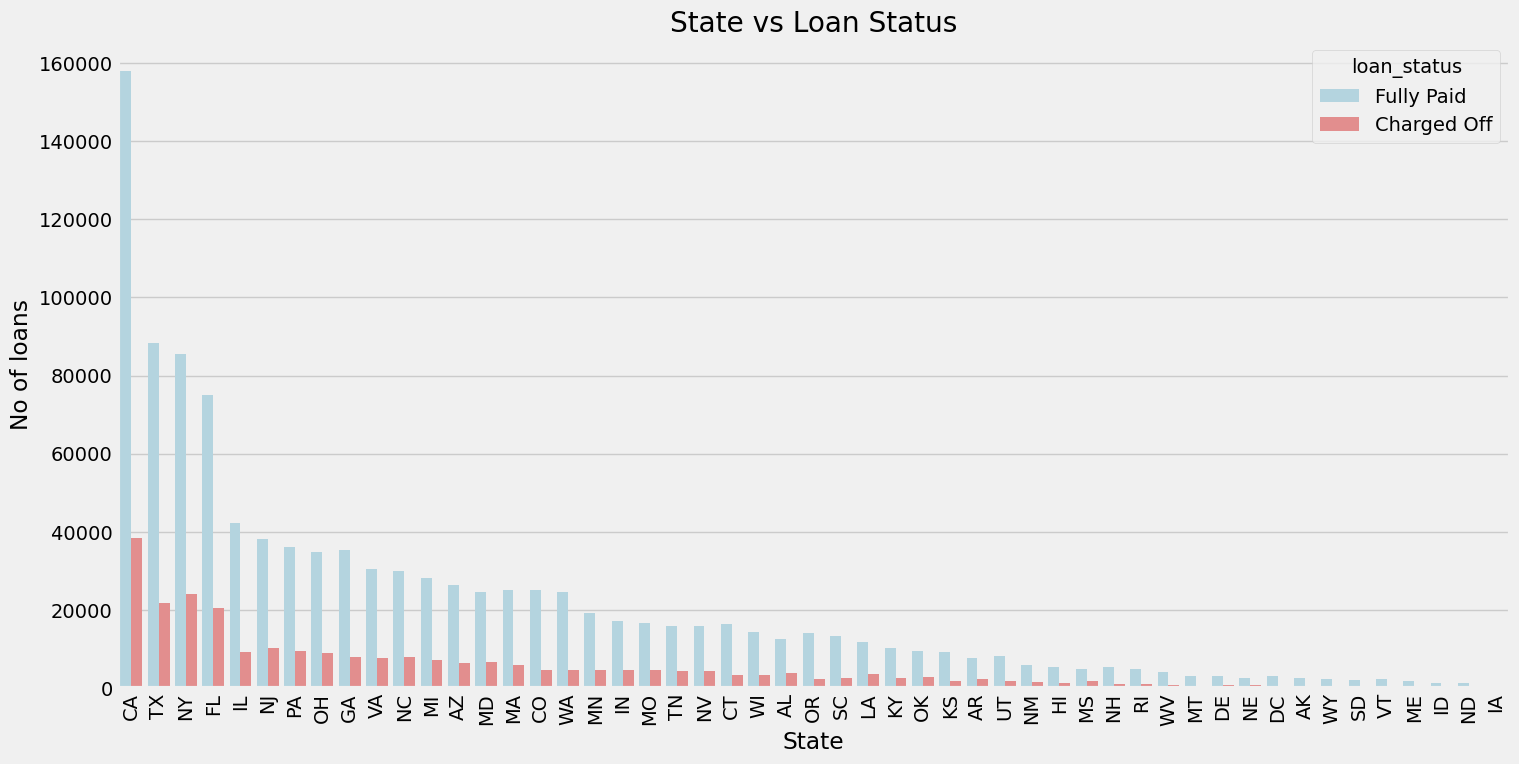

In [43]:
state_order = df['addr_state'].value_counts().index

plt.figure(figsize=(16, 8), dpi =100)
fig = sns.countplot(x='addr_state',  hue="loan_status", data=df, palette=custom_palette, order=state_order)

plt.xlabel('State')
plt.ylabel('No of loans')
plt.title('State vs Loan Status')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

plt.show()

In [44]:
def get_region(state):
    west = ['CA', 'OR', 'UT', 'WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
    south_west = ['AZ', 'TX', 'NM', 'OK']
    south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN']
    mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
    north_east = ['CT', 'NY', 'PA', 'NJ', 'RI', 'MA', 'MD', 'VT', 'NH', 'ME']

    if state in west:
        return 'West'
    elif state in south_west:
        return 'Southwest'
    elif state in south_east:
        return 'Southeast'
    elif state in mid_west:
        return 'Midwest'
    elif state in north_east:
        return 'Northeast'
    else:
        return 'Other'

states = df['addr_state'].unique()
regions = [get_region(state) for state in states]

# Add the 'region' column to the DataFrame
df['region'] = df['addr_state'].map(get_region)

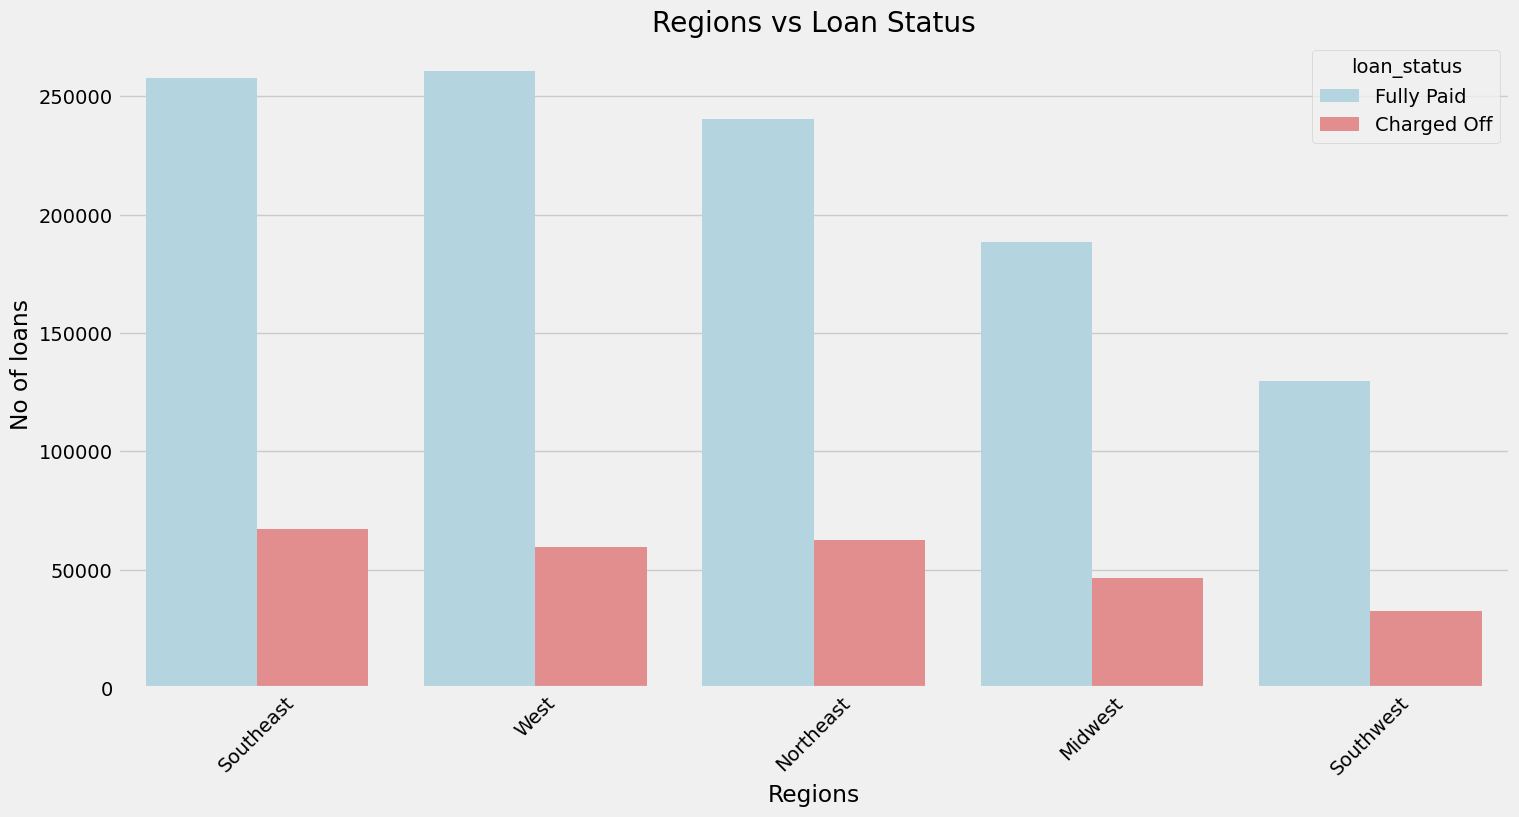

In [45]:
region_order = df['region'].value_counts().index

plt.figure(figsize=(16, 8), dpi =100)
fig = sns.countplot(x='region',  hue="loan_status", data=df, palette=custom_palette, order=region_order)

plt.xlabel('Regions')
plt.ylabel('No of loans')
plt.title('Regions vs Loan Status')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

plt.show()

#### Other categorical variables Analysis

In [46]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [47]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

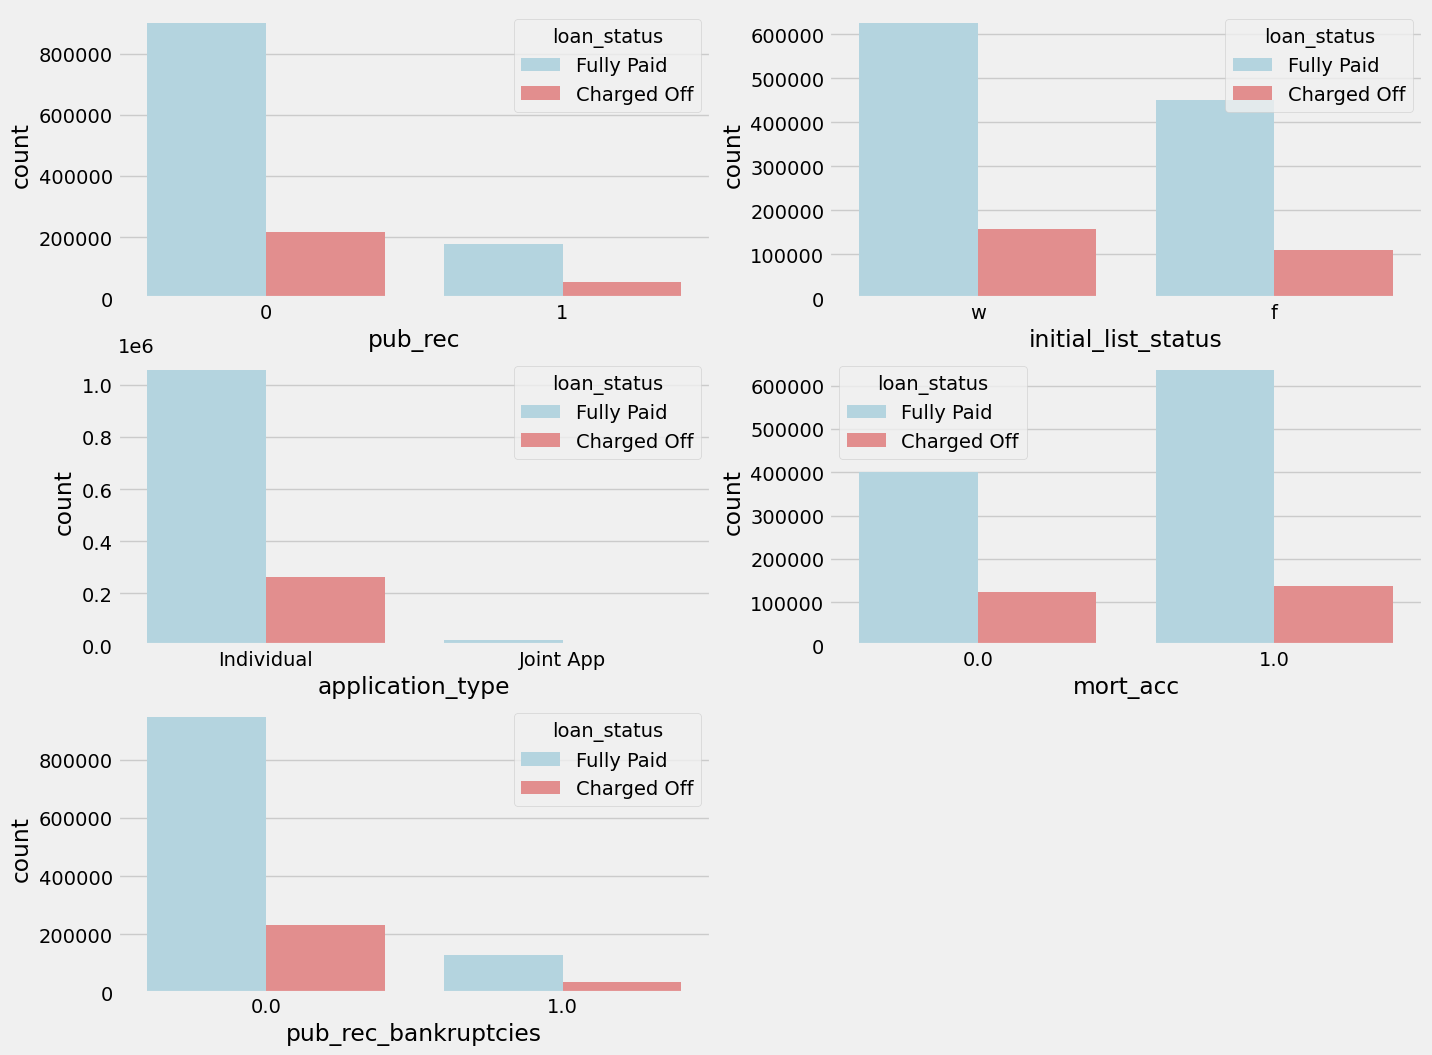

In [48]:
plt.figure(figsize=(15, 25), dpi=100)

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status',palette=custom_palette)

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status', palette=custom_palette)

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status', palette=custom_palette)

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status', palette=custom_palette)

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status', palette=custom_palette)

#### 7. Model
We will base our model on a conservative approach and evaluation metrics. The loan default prediction is a problem of binary classification. Logistic Regression is a good model for this problem.

#### Getting data ready for feeding into Model

In [49]:
#emp_title is not relevant for analysis
df.drop('emp_title', axis=1, inplace=True)

In [50]:
# convert term to integer before exporting
# df['term'] = df['term'].str.extract('(\d+)').astype(int)
# exporting data to csv for dashboarding in Tableau

df.to_csv('lending_club.csv', index=False)

In [51]:
df1 = df.copy()

In [52]:
# title is same as purpose so we can drop it
df1.drop('title', axis=1, inplace=True)

In [53]:
missing_values = df1.isnull().sum().sort_values(ascending=False)
missing_values.head(10)

emp_length              78511
mort_acc                47281
int_rate_bin            26331
revol_util                857
pub_rec_bankruptcies      697
dti                       374
zip_code                    1
pub_rec                     0
fico_range_low              0
fico_range_high             0
dtype: int64

In [54]:
for column in df1.columns:
    if df1[column].isna().sum() != 0:
        missing = df1[column].isna().sum()
        portion = (missing / df1.shape[0]) * 100
        print(f"{column}: Null count {missing} ==> {portion:.3f}%")

emp_length: Null count 78511 ==> 5.836%
zip_code: Null count 1 ==> 0.000%
dti: Null count 374 ==> 0.028%
revol_util: Null count 857 ==> 0.064%
mort_acc: Null count 47281 ==> 3.515%
pub_rec_bankruptcies: Null count 697 ==> 0.052%
int_rate_bin: Null count 26331 ==> 1.957%


#### although emp_length >10years looks related to charged off loans, it doesnt meet causation. So we will drop it. Zip code and int_rate bins can be dropped as well

In [55]:
columns_to_drop = ['emp_length', 'int_rate_bin', 'zip_code', 'fico_range_low', 'fico_range_high']

df1.drop(columns=columns_to_drop, inplace=True)

In [56]:
# dont need member_id and region as well

df1.drop('id', axis=1, inplace=True)
df1.drop('region', axis=1, inplace=True)

In [57]:
# Need to deal with the Mort_acc and other nulls- since they are only 3% or less in proportion, we will remove the null rows
df1.dropna(inplace=True)

In [58]:
df1.shape

(1296861, 27)

In [59]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'issue_year'],
      dtype='object')

#### Feature selection and one hot encoding

In [60]:
categorical_columns = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 
                       'application_type']

df1_encoded = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

df1_encoded.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment sub_grade  \
0     3600.0       3600.0           3600.0     13.99       123.03        C4   
1    24700.0      24700.0          24700.0     11.99       820.28        C1   
2    20000.0      20000.0          20000.0     10.78       432.66        B4   
4    10400.0      10400.0          10400.0     22.45       289.91        F1   
5    11950.0      11950.0          11950.0     13.44       405.18        C3   

   annual_inc    issue_d loan_status addr_state  ...  purpose_major_purchase  \
0     55000.0 2015-12-01  Fully Paid         PA  ...                       0   
1     65000.0 2015-12-01  Fully Paid         SD  ...                       0   
2     63000.0 2015-12-01  Fully Paid         IL  ...                       0   
4    104433.0 2015-12-01  Fully Paid         PA  ...                       1   
5     34000.0 2015-12-01  Fully Paid         GA  ...                       0   

  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0               0               0              0                         0   
1               0               0              0                         0   
2               0               0              0                         0   
4               0               0              0                         0   
5               0               0              0                         0   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                       0                 0                0   
1                       1                 0                0   
2                       0                 0                0   
4                       0                 0                0   
5                       0                 0                0   

   initial_list_status_w  application_type_Joint App  
0                      1                           0  
1                      1                           0  
2                      1                           1  
4                      1                           0  
5                      1                           0  

[5 rows x 49 columns]

In [61]:
# Convert the target variable to binary

df1_encoded['loan_status'] = df1_encoded['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

In [62]:
# encoding state as a categorical column

top_states = ['CA', 'FL', 'NY', 'TX', 'NJ']

# Map states not in the top 5 to 'other'
df1_encoded['addr_state'] = df1_encoded['addr_state'].apply(lambda x: x if x in top_states else 'other')

In [63]:
df1_encoded = pd.get_dummies(df1_encoded, columns=['addr_state'], drop_first=False)

In [64]:
# drop unnecessary columns

cols = ['funded_amnt', 'funded_amnt_inv', 'issue_d', 'sub_grade', 'earliest_cr_line']
df1_encoded = df1_encoded.drop(columns=cols, axis=1,)

In [65]:
df1_encoded.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'issue_year', 'term_ 60 months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_Joint App', 'addr_state_CA', 'addr_state_FL',
       'addr_state_NJ', 'addr_state_NY', 'addr_state_TX', 'add

In [66]:
df1_encoded.shape

(1296861, 49)

In [67]:
#print(f"Data shape: {data.shape}")

# # Remove duplicate Features

#data = data.T.drop_duplicates()
#data = data.T

# # Remove Duplicate Rows
#data.drop_duplicates(inplace=True)

#print(f"Data shape: {data.shape}")

In [68]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [69]:
df1_encoded.head(-5)

loan_amnt  int_rate  installment  annual_inc  loan_status    dti  \
0           3600.0     13.99       123.03     55000.0            0   5.91   
1          24700.0     11.99       820.28     65000.0            0  16.06   
2          20000.0     10.78       432.66     63000.0            0  10.78   
4          10400.0     22.45       289.91    104433.0            0  25.37   
5          11950.0     13.44       405.18     34000.0            0  10.20   
...            ...       ...          ...         ...          ...    ...   
2260677    11200.0     13.49       257.66     86000.0            1   4.80   
2260680    40000.0     15.59       964.03    220000.0            0  10.88   
2260684    15000.0     10.49       487.47     60000.0            0  26.40   
2260685    36400.0     14.49       856.24     95000.0            1  21.50   
2260686    23800.0     14.49       559.85    119000.0            0  32.73   

         open_acc  pub_rec  revol_bal  revol_util  ...  purpose_vacation  \
0             7.0        0     2765.0        29.7  ...                 0   
1            22.0        0    21470.0        19.2  ...                 0   
2             6.0        0     7869.0        56.2  ...                 0   
4            12.0        0    21929.0        64.5  ...                 0   
5             5.0        0     8822.0        68.4  ...                 0   
...           ...      ...        ...         ...  ...               ...   
2260677       7.0        1    12581.0        54.7  ...                 0   
2260680      19.0        0    43437.0        13.3  ...                 0   
2260684      24.0        0    48654.0        36.1  ...                 0   
2260685      11.0        0    55723.0        79.8  ...                 0   
2260686      13.0        0   107747.0        89.5  ...                 0   

         purpose_wedding  initial_list_status_w  application_type_Joint App  \
0                      0                      1                           0   
1                      0                      1                           0   
2                      0                      1                           1   
4                      0                      1                           0   
5                      0                      1                           0   
...                  ...                    ...                         ...   
2260677                0                      0                           0   
2260680                0                      0                           0   
2260684                0                      0                           0   
2260685                0                      0                           0   
2260686                0                      0                           0   

         addr_state_CA  addr_state_FL  addr_state_NJ  addr_state_NY  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
4                    0              0              0              0   
5                    0              0              0              0   
...                ...            ...            ...            ...   
2260677              0              0              0              0   
2260680              0              0              0              1   
2260684              0              0              0              0   
2260685              1              0              0              0   
2260686              0              0              0              0   

         addr_state_TX  addr_state_other  
0                    0                 1  
1                    0                 1  
2                    0                 1  
4                    0                 1  
5                    0                 1  
...                ...               ...  
2260677              0                 1  
2260680              0   

## Declare feature vector and target variable 

In [70]:
X = df1_encoded.drop(columns=['loan_status'], axis=1)
y = df1_encoded['loan_status']

## Split data into separate training and test set 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [72]:
X_train.shape, X_test.shape

((972645, 48), (324216, 48))

## Model Training

In [272]:
def classify(model, X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    model.fit(X_train, y_train)
    print(f"Accuracy is: {model.score(X_test, y_test)*100}")
    
    # Corssvalidation train, test
    score = cross_val_score(model, X,y, cv=5)
    print(f"Crossvalidaton score is: {np.mean(score)*100}")

In [273]:
model = LogisticRegression()
classify(model, X, y)

C:\Users\capri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy is: 79.8072889678486


C:\Users\capri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\capri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\capri\anaconda3\lib\site-packages

Crossvalidaton score is: 79.81973388859039


In [274]:
X_train.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  972645.000000  972645.000000  972645.000000  9.726450e+05   
mean    14521.660601      13.279816     441.661115  7.652487e+04   
std      8735.143190       4.793033     262.267042  6.927760e+04   
min      1000.000000       5.310000       4.930000  3.900000e+01   
25%      8000.000000       9.750000     251.360000  4.600000e+04   
50%     12000.000000      12.790000     377.410000  6.500000e+04   
75%     20000.000000      16.020000     585.740000  9.074800e+04   
max     40000.000000      30.990000    1719.830000  9.550000e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  972645.000000  972645.000000  972645.000000  9.726450e+05   
mean       18.449755      11.680870       0.173952  1.634788e+04   
std        11.210519       5.495531       0.379069  2.246788e+04   
min        -1.000000       1.000000       0.000000  0.000000e+00   
25%        11.940000       8.000000       0.000000  6.014000e+03   
50%        17.770000      11.000000       0.000000  1.119700e+04   
75%        24.270000      14.000000       0.000000  1.983900e+04   
max       999.000000      90.000000       1.000000  2.568995e+06   

          revol_util      total_acc  ...  purpose_vacation  purpose_wedding  \
count  972645.000000  972645.000000  ...     972645.000000    972645.000000   
mean       51.862297      25.094669  ...          0.006594         0.000960   
std        24.353904      12.018203  ...          0.080938         0.030973   
min         0.000000       2.000000  ...          0.000000         0.000000   
25%        33.600000      16.000000  ...          0.000000         0.000000   
50%        52.200000      23.000000  ...          0.000000         0.000000   
75%        70.600000      32.000000  ...          0.000000         0.000000   
max       193.000000     176.000000  ...          1.000000         1.000000   

       initial_list_status_w  application_type_Joint App  addr_state_CA  \
count          972645.000000               972645.000000  972645.000000   
mean                0.603711                    0.019426       0.145076   
std                 0.489126                    0.138018       0.352177   
min                 0.000000                    0.000000       0.000000   
25%                 0.000000                    0.000000       0.000000   
50%                 1.000000                    0.000000       0.000000   
75%                 1.000000                    0.000000       0.000000   
max                 1.000000                    1.000000       1.000000   

       addr_state_FL  addr_state_NJ  addr_state_NY  addr_state_TX  \
count  972645.000000  972645.000000  972645.000000  972645.000000   
mean        0.071133       0.035677       0.081155       0.082417   
std         0.257047       0.185484       0.273073       0.274998   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       addr_state_other  
count     972645.000000  
mean           0.584543  
std            0.492801  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            1.000000  
max            1.000000  

[8 rows x 48 columns]

## 11. Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Train and fit the model again

In [288]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [289]:
# Predict Results fully paid: 0, charged off: 1
y_pred_test = model.predict(X_test_scaled)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [291]:
# Perform 5-fold cross-validation and calculate the accuracy scores
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Score is:", cross_val_scores)

# Calculate the mean and standard deviation of the scores
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Score is: [0.8003146  0.79620776 0.80129312 0.79635427 0.79727958]
Mean Accuracy: 0.7982898691342128
Standard Deviation of Accuracy: 0.0021081495728213127


## Confusion Matrix

In [292]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [293]:
cm = confusion_matrix(y_test, y_pred_test)

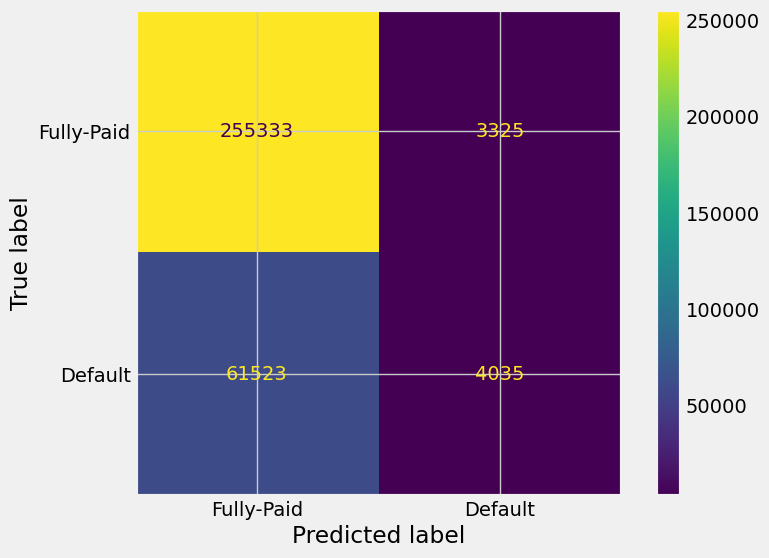

In [297]:
ConfusionMatrixDisplay(cm, display_labels = ['Fully-Paid', 'Default']).plot()

In [296]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    258658
           1       0.55      0.06      0.11     65558

    accuracy                           0.80    324216
   macro avg       0.68      0.52      0.50    324216
weighted avg       0.75      0.80      0.73    324216



## Decision Tree classifier

In [298]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X_train_scaled, y_train)

Accuracy is: 70.13513624661748
Crossvalidaton score is: 70.18120691516432


## Random Forest classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# classify(model, X_train_scaled, y_train)

In [89]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and fit the scaler on the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Step 3: Apply the same scaler to the test set
X_test = scaler.transform(X_test)


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [86]:
from sklearn.metrics import accuracy_score

def classify(model,X,y): 
    X_train_scaled, y_train, X_test_scaled, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")


In [87]:
print("Shapes of training data:")
print("X_train_scaled:", X_train_scaled.shape)
print("y_train_subset:", y_train_subset.shape)
print("Shapes of test data:")
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_subset:", y_test_subset.shape)

Shapes of training data:
X_train_scaled: (1037488, 48)
y_train_subset: (291793,)
Shapes of test data:
X_test_scaled: (259373, 48)
y_test_subset: (97265,)


In [88]:
rf_clf = RandomForestClassifier(n_estimators=25, min_samples_split=100, max_depth=7, max_features=1)
classify(model, X, y)

ValueError: Found input variables with inconsistent numbers of samples: [1037488, 324216]

## KNN Classifier

In [301]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaled, y_train)

y_pred_class = knn.predict(X_test_scaled)
score = metrics.accuracy_score(y_test, y_pred_test)
testing_error = 1 - score

print(testing_error)

KeyboardInterrupt: 

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(cm, display_labels = ['Fully-Paid', 'Default']).plot()